# Ford_gobike-trip Data Exploration

## Investigation Overview

In this investigation, I'm most interested in analysing which features contributes most to the usage of the bikes. Identify patterns that associates with how the bikes are used in terms of period, member attributes and location.

## Dataset Overview
This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The data was recorded in February 2019 with 183412 records and 16 features. Some data points were removed from the analysis due to missing information and outliers.

The cleaned dataset contains 174952 trip record in the dataset with 10 features giving details( start_station_name, end_station_name, bike_id, user_type, member_gender, bike_share_for_all_trip, hour, day_period, age, duration).

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
#loading data
bike = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
#convert columns to the right datatype
datetime_cols = ['start_time', 'end_time']
id_cols = ['start_station_id', 'end_station_id', 'bike_id']

for col in datetime_cols:
    bike[col] = pd.to_datetime(bike[col])
    
for col in id_cols:
    bike[col] = bike[col].astype(str)
    
# bike['member_birth_year'] = bike['member_birth_year'].astype(int)
    
bike.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                          object
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
dtype: object

In [4]:
#duration in hour
bike['hour'] = bike.start_time.dt.hour

#function to extract period
def period(x):
    if (x >= 4) and (x <= 12):
        return 'Morning'
    elif (x > 12) and (x < 17):
        return 'Afternoon'
    elif (x >= 17) and (x <= 21):
        return 'Evening'
    else:
        return 'Night'

#extract the day period
#Morning, Afternoon, Evening and Night

bike['day_period'] = bike.hour.apply(period)

In [5]:
#get the user age from the present year(2022)
bike['age'] = 2022 - bike['member_birth_year']

In [6]:
#convert the duration in secs to minutes
#for easy description

bike['duration'] = bike['duration_sec'] / 60

In [7]:
to_drop = ['start_station_latitude', 'start_station_longitude', 'duration_sec',
           'end_station_latitude', 'end_station_longitude', 'member_birth_year',
          'start_time', 'end_time', 'start_station_id', 'end_station_id']

bike.drop(columns = to_drop, axis=1, inplace=True)

In [8]:
missing_df = 8265 + 197
total_df = bike.shape[0]

missing_per = (missing_df/total_df)*100

print('Percentage of missing is', missing_per)

Percentage of missing is 4.613656685494951


In [9]:
bike = bike.dropna()

In [10]:
#countplot function
def countplot(x, data= bike, order=None, title=''):
    sns.countplot(x=x, data=data, color='darkblue',
                 order=order)
    plt.title(title)

In [11]:
#histplot function
def histplot(data=bike, x='', binsize=10, x_start=0, label=''):
    
    bins = np.arange(x_start, bike[x].max()+binsize, binsize)

    plt.figure(figsize=[8, 5])
    plt.hist(data = data, x = x, bins=bins)
    plt.xlabel(label);

## Distribution of Age

After dropping outliers in this data the age range between 20 and 100. Majority of the users are between age 25 and 40. The distribution is right skewed.

In [12]:
#data of where age > 115
max_age = 100

drop_index = bike.query('age > @max_age').index
bike = bike.query('index not in @drop_index')

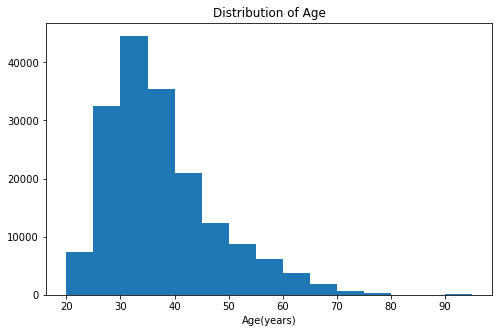

In [13]:
#new age distribution
histplot(x='age', binsize=5, x_start=20, label='Age(years)')
plt.title('Distribution of Age');

## Categories of Gender

There are 3 categories of the members gender; Male, Female and Others. The Male Gender dominate the membership, followed by the Female gender and lastly the Others. More than 70% of the Members are Male.

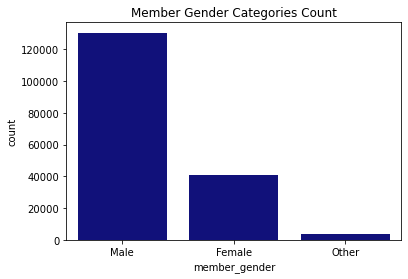

In [14]:
countplot(x='member_gender', order=['Male', 'Female', 'Other'], 
         title='Member Gender Categories Count')

## User Type Categories

There are 2 categories of members; Customer and Subscriber. 90.5% of the Members are Subscribers and the 9.5% are Customers

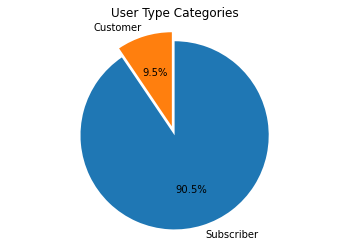

In [15]:
# pie chart
sorted_counts = bike.user_type.value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, 
        startangle = 90, counterclock = False, autopct='%1.1f%%', explode = (0.1,0));
plt.axis('equal')
plt.title('User Type Categories');

## Most Common Station

There are 329 unique Start and End stations in the dataset. Market St at 10th St, San Francisco Caltrain Station 2(Townsend St at 4th St), Berry St at 4th St, Montgomery St BART Station(Market St at 2nd St) are the most common Start and End Stations for the members trip within the city.

In [16]:
#top start and end stations
top_start = bike.start_station_name.value_counts()[:10]
top_end = bike.end_station_name.value_counts()[:10]

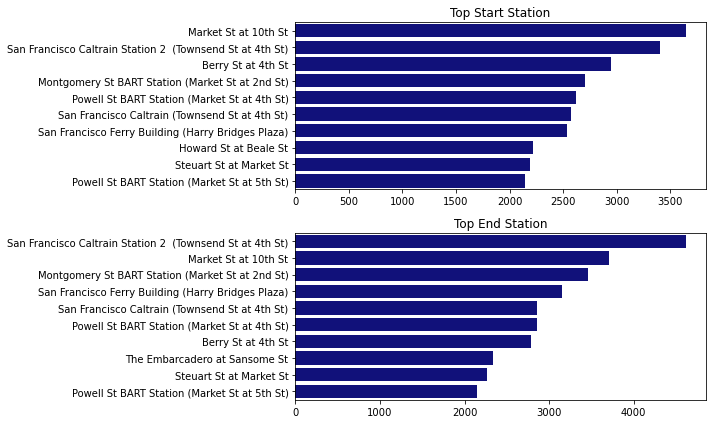

In [17]:
#plotting the top 10 start and end
fig, ax = plt.subplots(nrows=2, figsize = [10,6])

#bars
sns.barplot(y = top_start.index, x = top_start.values, color='darkblue', ax=ax[0])
sns.barplot(y = top_end.index, x = top_end.values, color='darkblue', ax=ax[1]);

#subplots title
ax[0].title.set_text('Top Start Station')
ax[1].title.set_text('Top End Station')

#even the spaces between subplots
fig.tight_layout()

## Categories of Trip Period

Most trip are taken in the Morning, followed by Evening and less at Night.

Specifically, between 7AM and 9AM in the Morning, and between 4PM and 6PM in the Evening exist the highest trip. This period happen to be the resumption hour and closing hour respectively in the city which contribute to the increase in trip usage. Trips count between 10AM and 3PM, which fall within office hour, are relatively constant. The trip count then drop from 7PM till 6AM.

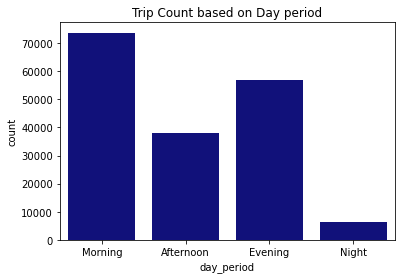

In [18]:
#day period count
day_order = ['Morning', 'Afternoon', 'Evening', 'Night']
countplot(x='day_period', order=day_order, 
         title='Trip Count based on Day period')

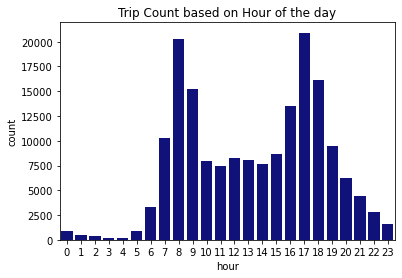

In [19]:
#hour count for trips
countplot(x='hour', order=None, 
         title='Trip Count based on Hour of the day')

## Distribution of Trip Duration

Using the log scale the duration distribution becomes relatively a normal distribution. Majority of the trips are between 5 to 25mins, fairly a short trips. The average trip is 9mins. From the normal distribution it can be concluded that 90% of the trip duration is less than 30minutes

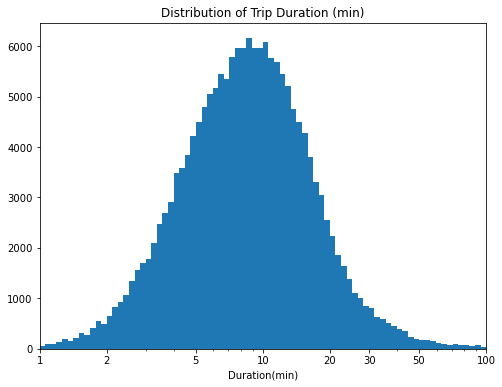

In [20]:
#log distribution
binsize=0.025
bin_edges=10 ** np.arange(0, np.log10(bike.duration.max())+binsize, binsize)
plt.figure(figsize=[8,6])

plt.hist(data=bike, x='duration', bins=bin_edges)
plt.xscale('log')
plt.xticks([1,2,5,10,20,30,50,100,200,500,1000,2000],[1,2,5,10,20,30,50,100,200,500,'1k','2k'])
plt.xlabel('Duration(min)')
plt.xlim((1,100))
plt.title('Distribution of Trip Duration (min)');

## Categories of Share Trip

Majority of the member do not share bike for trip. Only few, about 10%, prefer to share bikes for trip

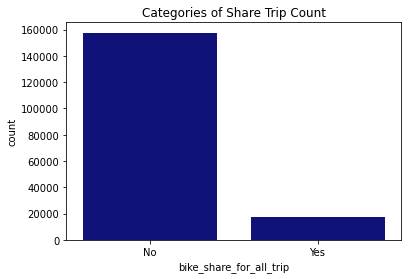

In [21]:
#bike_share trip
countplot(x='bike_share_for_all_trip', order=None, 
         title='Categories of Share Trip Count')

## Age vs. Hour/Duration

It is observed from that correlation between duration and age is close to 0, impling that there is no linear relationship between them. Age and hour shows a weak negative correlation.

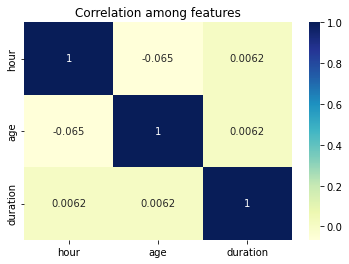

In [22]:
num_corr = bike.corr()

#correlation plot
sns.heatmap(num_corr, annot=True, cmap='YlGnBu')
plt.title('Correlation among features');

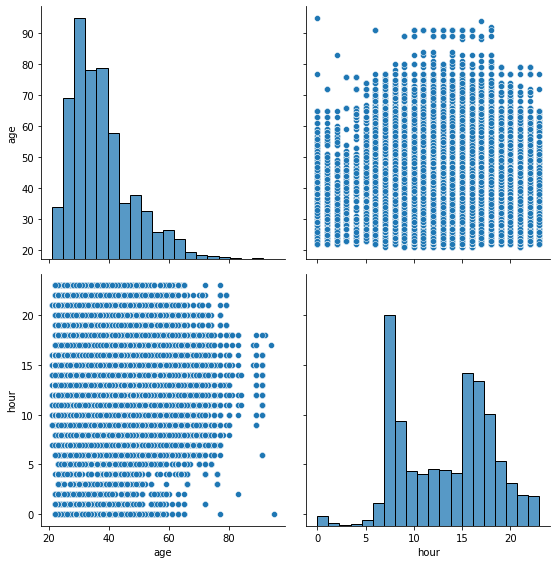

In [23]:
gr = sns.PairGrid(vars=['age', 'hour'], data=bike, height=4)
gr.map_offdiag(sns.scatterplot)
gr.map_diag(sns.histplot, bins=20);

## Member Info vs. Trip Info

The average duration for subscriber is lower than that of customers and 75% of the subscriber duration is lower than the average duration for customers.

The female gender and other spend a little more time than the male which is quite expected. And the average age for the other gender is higher than the male and female with female having the lowest.

Customers that do not share bike for trips spend have higher duration and the average age is higher compared to those that share

Average duration is relatively the same in the evening and morning, but higher in the afternoon and lowest at night. This is quite expected trend.

The average age of customers that use the bike in the afternoon is high in the morning and low in the night. The evening and afternoon remained fairly the same.

<Figure size 720x720 with 0 Axes>

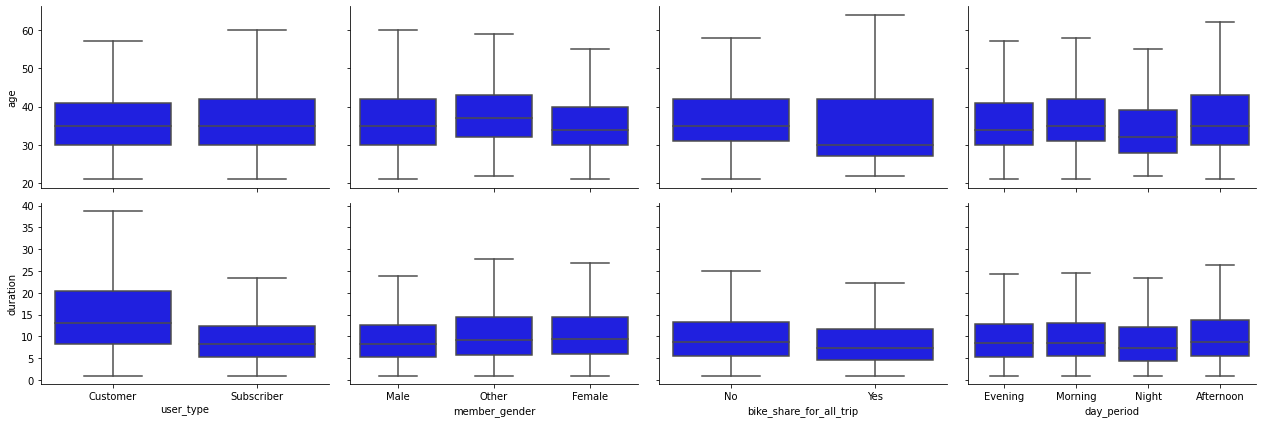

In [24]:
#function to call boxplot
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y, color='blue', showfliers=False);
    #showfliers = False to drop outliers

    
#plot pairgrid
plt.figure(figsize=[10,10])
cat_vars = ['user_type', 'member_gender', 'bike_share_for_all_trip', 'day_period']
g = sns.PairGrid(data=bike, x_vars=cat_vars, y_vars=['age', 'duration'], height=3, aspect=1.5)
g.map(boxplot);

## Total Duration From Start or End Station

As expected, some of the top start duration are still topping in total duration covered for the period. Market St at 10th St, San Francisco Caltrain Station 2(Townsend St at 4th St), Berry St at 4th St, Montgomery St BART Station(Market St at 2nd St) are example.


In [25]:
start_stat_dur = bike.groupby('start_station_name').duration.sum().sort_values(ascending=False).reset_index()[:10]
end_stat_dur = bike.groupby('end_station_name').duration.sum().sort_values(ascending=False).reset_index()[:10]

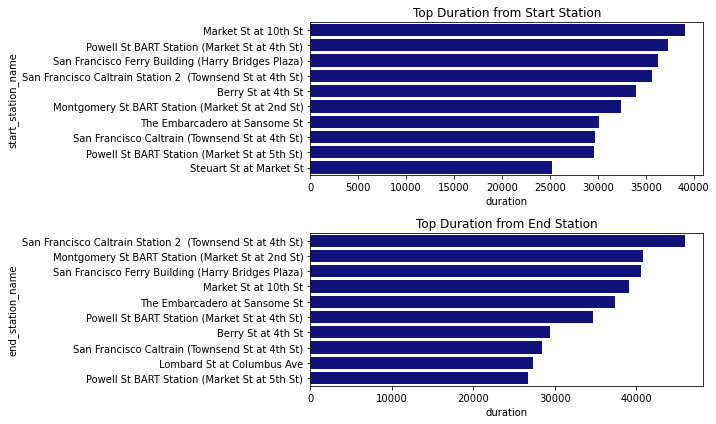

In [26]:
#plotting the top 10 start and end
fig, ax = plt.subplots(nrows=2, figsize = [10,6])

#bars
sns.barplot(y = start_stat_dur.start_station_name, x = start_stat_dur.duration, color='darkblue', ax=ax[0])
sns.barplot(y = end_stat_dur.end_station_name, x = end_stat_dur.duration, color='darkblue', ax=ax[1]);

#subplots title
ax[0].title.set_text('Top Duration from Start Station')
ax[1].title.set_text('Top Duration from End Station')

#even the spaces between subplots
fig.tight_layout()

## Member Info and Day Period

8am and 5am records the highest Male and Female. The Male are the highest user for all the hour of the day. All gender experince the highest users in the morning followed by Evening.

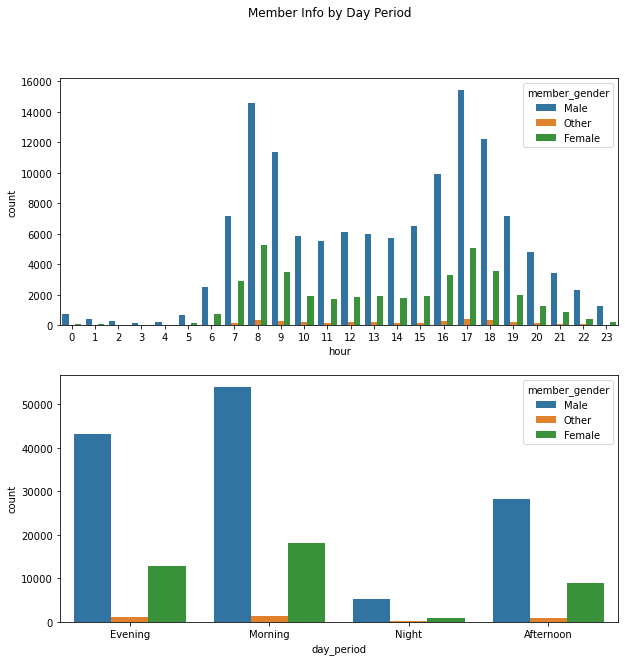

In [27]:
#gneder and day info 
fig, ax = plt.subplots(nrows=2, figsize=[10,10])
sns.countplot(data=bike, x='hour', hue='member_gender', ax=ax[0])
sns.countplot(data=bike, x='day_period', hue='member_gender', ax=ax[1])
fig.suptitle('Member Info by Day Period');

## Member Info vs. Duration 

Generally, the average duration of User type Customer is higher than the duration of Subscribers. The Other gender appeared to use higher duration both as Customers or as Subcribers, and the Female gender having the lowest bike usage duration. The Other Gender has the highest duration at Night. At all period of the day the Male Gender used the lowest duration for trips.
The duration for all customers who did not share bike for all trips is relatively higher than those who did.

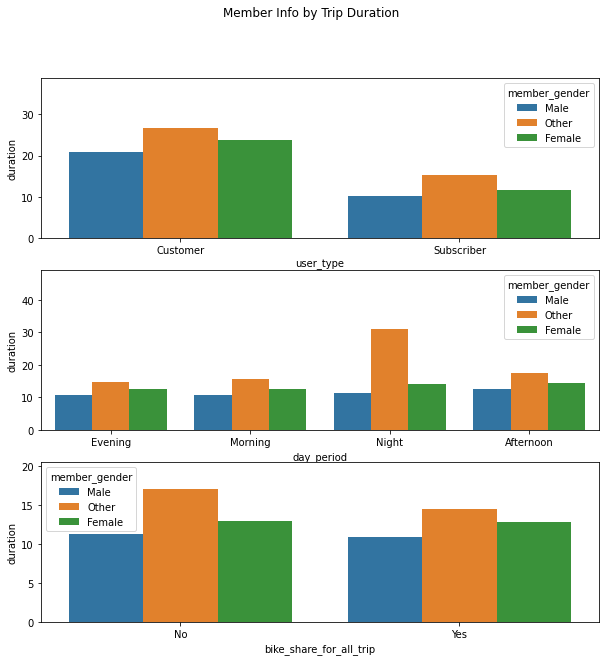

In [28]:
# categorical features with trip duration using user_type as hue
fig, ax = plt.subplots(nrows=3, figsize=[10,10])
sns.barplot(data=bike, x='user_type', y='duration', hue='member_gender', errwidth=0, ax=ax[0])
sns.barplot(data=bike, x='day_period', y='duration', hue='member_gender', errwidth=0, ax=ax[1])
sns.barplot(data=bike, x='bike_share_for_all_trip', y='duration', hue='member_gender', errwidth=0, ax=ax[2])
fig.suptitle('Member Info by Trip Duration');

In [29]:
# The command below will generate the HTML slideshow. 
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt 

^C
